In [22]:
#importing the necessary libraries and make matrix formulation to find beta and we take lambda as a regularizatio parameter
import pylab
import numpy
x = numpy.linspace(-1,1,100)
signal = 2 + x + 2 * x * x
noise=numpy.random.normal(0,0.1,100)
y=signal + noise
x_train=x[0:80]
y_train=y[0:80]
train_rmse=[]
test_rmse=[]
degree=80
lambda_reg_values=numpy.linspace(0.01,0.99,100)

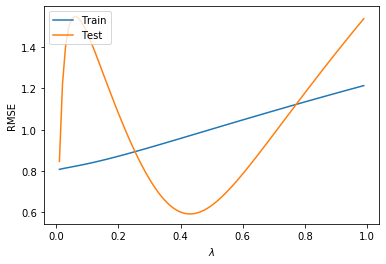

In [23]:
for lambda_reg in lambda_reg_values:
    X_train = numpy.column_stack([numpy.power(x_train,i) for i in range(0,degree)])
    model = numpy.dot(numpy.dot(numpy.linalg.inv(numpy.dot(X_train.transpose(),X_train) + lambda_reg * numpy.identity(degree)),X_train.transpose()),y_train)
    predicted = numpy.dot(model, [numpy.power(x,i) for i in range(0,degree)])
    train_rmse.append(numpy.sqrt(numpy.sum(numpy.dot(y[0:80] - predicted[0:80], y_train - predicted[0:80]))))
    test_rmse.append(numpy.sqrt(numpy.sum(numpy.dot(y[80:] - predicted[80:], y[80:] - predicted[80:]))))

pylab.plot(lambda_reg_values, train_rmse)
pylab.plot(lambda_reg_values, test_rmse)
pylab.xlabel(r"$\lambda$")
pylab.ylabel("RMSE")
pylab.legend(["Train", "Test"], loc = 2)
pylab.show()


In [25]:
#You can see that how Rmse drops and our model becomes less complex using regularization and around the value of 0.42122 the RMSe is very low